In [1]:
import glob
import shutil
import os
import numpy as np
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
g=glob.glob('data/color') 

In [ ]:
g

In [ ]:
dirs=os.listdir('data/color')
dirs

In [ ]:
for i in dirs:
    p='data/color/'+i
    print(p)
    !mkdir "$p"

In [ ]:
for dir in dirs:
    path='data'+dir+'\\*.jpg'
    g=glob.glob(path) 
    shuf=np.random.permutation(g) 
    for i in range(500):
        #dest='C:\\Users\\Reliance Digital\\Desktop\\ml\\statefarm\\images\\valid\\' + dir  
        print (shuf[i].replace("train","valid"))
        #os.rename(shuf[i],shuf[i].replace("train","valid"))  

In [ ]:
os.getcwd()

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_gen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_gen.flow_from_directory(directory='data\color',
                                            target_size=(224,224),
                                            class_mode='categorical',
                                            color_mode="rgb",
                                            shuffle='True',
                                            batch_size=32
                                           )

Found 37851 images belonging to 33 classes.


In [5]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Cherry_(including_sour)___Powdery_mildew': 4,
 'Cherry_(including_sour)___healthy': 5,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6,
 'Corn_(maize)___Common_rust_': 7,
 'Corn_(maize)___Northern_Leaf_Blight': 8,
 'Corn_(maize)___healthy': 9,
 'Grape___Black_rot': 10,
 'Grape___Esca_(Black_Measles)': 11,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12,
 'Grape___healthy': 13,
 'Peach___Bacterial_spot': 14,
 'Peach___healthy': 15,
 'Pepper__bell___Bacterial_spot': 16,
 'Pepper__bell___healthy': 17,
 'Potato___Early_blight': 18,
 'Potato___Late_blight': 19,
 'Potato___healthy': 20,
 'Strawberry___Leaf_scorch': 21,
 'Strawberry___healthy': 22,
 'Tomato_Bacterial_spot': 23,
 'Tomato_Early_blight': 24,
 'Tomato_Late_blight': 25,
 'Tomato_Leaf_Mold': 26,
 'Tomato_Septoria_leaf_spot': 27,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 28,
 'Tomato__Target_Spot': 29,
 'Tomat

In [6]:
train_generator.batch_size

32

In [ ]:
x_batch,y_batch=next(train_batches)
for i in range (0,32):
    image = np.array(x_batch[i])
    plt.imshow(image.astype('uint8'))
    print(y_batch[i])
    plt.show()

In [7]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(33,activation='softmax')(x) #final layer with softmax activation

D:\programs\anaconda\envs\tf-gpu\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [8]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [12]:
#for layer in model.layers:
#    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [13]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
step_size_train=train_generator.n//train_generator.batch_size

In [14]:
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
1182/1182 [==============================] - 292s 247ms/step - loss: 0.4390 - acc: 0.8761
Epoch 2/5
1182/1182 [==============================] - 270s 229ms/step - loss: 0.2109 - acc: 0.9421
Epoch 3/5
1182/1182 [==============================] - 272s 230ms/step - loss: 0.1781 - acc: 0.9524
Epoch 4/5
1182/1182 [==============================] - 273s 231ms/step - loss: 0.1429 - acc: 0.9630
Epoch 5/5
1182/1182 [==============================] - 273s 231ms/step - loss: 0.1186 - acc: 0.9694


In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("weights/model.json", "w") as json_file:
    json_file.write(model_json)

In [16]:
# serialize weights to HDF5
model.save_weights("weights/model.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
# load json and create model
from keras.models import model_from_json
json_file = open('weights/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [2]:
import cv2
from tqdm import tqdm
import itertools

In [1]:
features = []
#for i in tqdm(files_location):
im = cv2.imread("test images/grape_blackrot.JPG")
im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (224, 224)).astype(np.float32)
im = np.expand_dims(im, axis =0)
outcome = loaded_model.predict(im)

NameError: name 'cv2' is not defined

In [60]:
features.append(outcome)

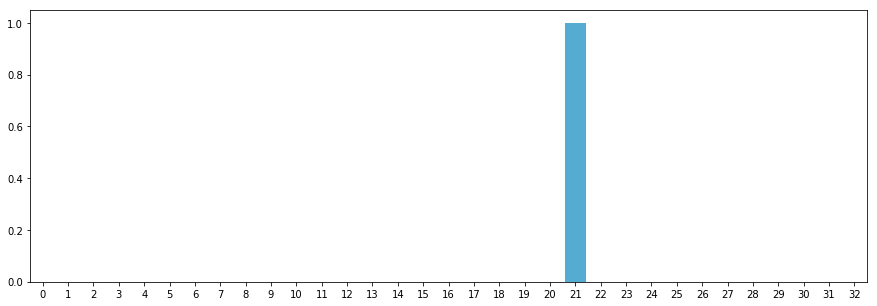

In [61]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x=list(train_generator.class_indices.values()),y=outcome[0])

In [62]:
np.argmax(outcome)

21

In [64]:
outcome

array([[1.1808842e-07, 1.5787871e-08, 8.6208418e-10, 3.5274009e-10,
        4.5771914e-11, 9.3883932e-09, 2.7482562e-08, 3.4816040e-08,
        3.6535806e-07, 1.6285302e-08, 4.4705789e-08, 9.8652164e-10,
        2.4948542e-05, 6.5002906e-11, 1.9432415e-08, 7.0597038e-14,
        5.0332999e-10, 4.6102451e-09, 1.9790948e-06, 1.7084373e-08,
        1.2515295e-12, 9.9982798e-01, 2.0015174e-09, 1.4941762e-07,
        7.9056420e-08, 6.6563295e-08, 1.3766847e-09, 1.4402355e-04,
        6.7303225e-12, 7.0801374e-09, 2.4736135e-10, 5.4482120e-11,
        2.3090939e-10]], dtype=float32)

In [63]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Cherry_(including_sour)___Powdery_mildew': 4,
 'Cherry_(including_sour)___healthy': 5,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6,
 'Corn_(maize)___Common_rust_': 7,
 'Corn_(maize)___Northern_Leaf_Blight': 8,
 'Corn_(maize)___healthy': 9,
 'Grape___Black_rot': 10,
 'Grape___Esca_(Black_Measles)': 11,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12,
 'Grape___healthy': 13,
 'Peach___Bacterial_spot': 14,
 'Peach___healthy': 15,
 'Pepper__bell___Bacterial_spot': 16,
 'Pepper__bell___healthy': 17,
 'Potato___Early_blight': 18,
 'Potato___Late_blight': 19,
 'Potato___healthy': 20,
 'Strawberry___Leaf_scorch': 21,
 'Strawberry___healthy': 22,
 'Tomato_Bacterial_spot': 23,
 'Tomato_Early_blight': 24,
 'Tomato_Late_blight': 25,
 'Tomato_Leaf_Mold': 26,
 'Tomato_Septoria_leaf_spot': 27,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 28,
 'Tomato__Target_Spot': 29,
 'Tomat